# Energy data analysis

### This projects takes the energy information from BP statistical review and works on a correlation between the energies with the Carbon emission

### The source link for the excel file is https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2019-all-data.xlsx

#### The file has sort of energy information: the ones used for this project is:

##### Oil Production - Tonnes > displays the oil production in Tonnes from 1965 til 2018
##### Gas Production - Mtoe > displays the oil production in Mtoe from 1970 til 2018
##### Coal Production - Mtoe > displays the oil production in Mtoe from 1981 til 2018
##### Nuclear Generation - TWh > displays the nuclear generation in TWh from 1965 til 2018
##### Hydro Generation - TWh > displays the hydro generation in TWh from 1965 til 2018
##### Solar Generation - TWh > displays the solar generation in TWh from 1965 til 2018
##### Wind Generation - TWh > displays the wind generation in TWh from 1965 til 2018
##### Geo Biomass Other - TWh > displays the geo+biomass+other generation in TWh from 1965 til 2018
##### Biofuels Production - Ktoe > displays the oil production in Ktoe from 1990 til 2018
##### Carbon Dioxide Emissions > displays the carbon emission in Million tonnes from 1965 til 2018

### 0. Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas import ExcelWriter
%matplotlib inline

print('libraries imported')

libraries imported


### 1. Take all places, countries and regions

In [2]:
#Take the Places
Places = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Primary Energy Consumption', skiprows = 2)
Places.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Places.set_index('Countries', inplace=True)
Places = Places.iloc[:Places.index.get_loc('Total World')]
Places.dropna(how='all', axis=0, inplace=True)
Places = Places.index
Places

Index(['Canada', 'Mexico', 'US', 'Total North America', 'Argentina', 'Brazil',
       'Chile', 'Colombia', 'Ecuador', 'Peru', 'Trinidad & Tobago',
       'Venezuela', 'Central America', 'Other Caribbean',
       'Other South America', 'Total S. & Cent. America', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Other Europe', 'Total Europe',
       'Azerbaijan', 'Belarus', 'Kazakhstan', 'Russian Federation',
       'Turkmenistan', 'USSR', 'Uzbekistan', 'Other CIS', 'Total CIS', 'Iran',
       'Iraq', 'Israel', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia',
       'United Arab Emirates', 'Other Middle East', 'Total

In [3]:
#Take the countries
Countries = Places[~Places.str.startswith('Total')]#.sort_values()
Countries

Index(['Canada', 'Mexico', 'US', 'Argentina', 'Brazil', 'Chile', 'Colombia',
       'Ecuador', 'Peru', 'Trinidad & Tobago', 'Venezuela', 'Central America',
       'Other Caribbean', 'Other South America', 'Austria', 'Belgium',
       'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands',
       'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'Other Europe', 'Azerbaijan', 'Belarus',
       'Kazakhstan', 'Russian Federation', 'Turkmenistan', 'USSR',
       'Uzbekistan', 'Other CIS', 'Iran', 'Iraq', 'Israel', 'Kuwait', 'Oman',
       'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Other Middle East',
       'Algeria', 'Egypt', 'Morocco', 'South Africa', 'Eastern Africa',
       'Middle Africa', 'Wes

In [4]:
#Take the regions
Regions = Places[Places.str.startswith('Total')]
Regions

Index(['Total North America', 'Total S. & Cent. America', 'Total Europe',
       'Total CIS', 'Total Middle East', 'Total Africa', 'Total Asia Pacific'],
      dtype='object', name='Countries')

### 2. Import energy data

In [5]:
#Import the Oil production data
Oil = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Oil Production - Tonnes', skiprows = 2)
Oil.rename(columns={'Million tonnes':'Countries'}, inplace =True)
Oil.set_index('Countries', inplace=True)
Oil.dropna(how='all', axis=0, inplace=True)
Oil.dropna(how='all', axis=1, inplace=True)
Oil.fillna(0, inplace=True)
Oil = Oil.iloc[:Oil.index.get_loc('Total World'),:Oil.columns.get_loc(2018)+1]
display(Oil.head())

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,43.874178,48.212154,52.701140,57.119336,62.218043,70.067889,75.163773,86.713147,100.314612,94.386548,...,152.805856,160.293447,169.801471,182.588892,195.065121,209.378483,215.577023,217.973525,235.364915,255.481951
Mexico,18.053894,18.489542,20.463761,21.900666,22.965009,24.179007,24.107319,25.097617,25.859389,32.416193,...,146.664163,145.600519,144.518531,143.857278,141.845646,137.097677,127.515076,121.350559,109.471691,102.290672
US,427.694442,454.538861,484.221630,502.880332,511.351724,533.489849,525.887850,527.887889,514.652287,491.406303,...,322.207902,332.810079,345.430119,394.166671,447.160622,522.998330,566.611841,541.938841,573.912280,669.373704
Total North America,489.622514,521.240557,557.386531,581.900334,596.534776,627.736745,625.158942,639.698654,640.826287,618.209043,...,621.677921,638.704045,659.750121,720.612841,784.071389,869.474491,909.703940,881.262925,918.748886,1027.146327
Argentina,13.764759,14.643966,15.962276,17.487586,18.106759,20.000517,21.570862,22.218034,21.601172,21.144759,...,34.043661,33.278526,31.185337,30.843913,30.205430,29.803792,30.065655,28.650254,27.260089,27.562186


In [6]:
#Import the Gas production data
Gas = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Gas Production - Mtoe', skiprows = 2)
Gas.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Gas.set_index('Countries', inplace=True)
Gas.dropna(how='all', axis=0, inplace=True)
Gas.dropna(how='all', axis=1, inplace=True)
Gas.fillna(0, inplace=True)
Gas = Gas.iloc[:Gas.index.get_loc('Total World'),:Gas.columns.get_loc(2018)+1]
display(Gas.head())

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,46.445636,50.778160,57.330181,61.425193,60.150825,61.441574,61.982115,65.110705,62.833878,66.257309,...,133.319712,128.625172,129.897958,129.239209,130.627988,136.708169,138.225000,147.725064,152.667433,158.832426
Mexico,9.484357,9.387939,9.757543,10.602402,11.114534,11.297536,11.079529,11.750023,14.708396,17.855086,...,45.213286,44.005002,44.797069,43.723291,45.131590,44.109891,41.226954,37.533469,32.904939,32.127716
US,491.369130,505.297160,503.658648,503.200611,481.037997,445.435486,441.806203,443.734016,441.917333,455.323891,...,479.434661,494.546386,530.832800,558.146885,563.794269,605.955703,636.546176,625.413681,641.236866,715.201225
Total North America,547.299123,565.463259,570.746372,575.228207,552.303356,518.174596,514.867848,520.594744,519.459607,539.436286,...,657.967659,667.176560,705.527827,731.109385,739.553847,786.773762,815.998130,810.672215,826.809238,906.161367
Argentina,5.033921,5.439896,5.171058,5.630967,6.060774,6.432046,6.132687,6.330030,6.530718,6.045722,...,34.652787,33.531381,32.431509,31.548756,29.712686,29.652519,30.516891,32.057056,31.943154,33.899733


In [7]:
#Import Coal Production data 
Coal = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Coal Production - Mtoe', skiprows = 2)
Coal.rename(columns={'Million tonnes oil equivalent':'Countries'}, inplace =True)
Coal.set_index('Countries', inplace=True)
Coal.dropna(how='all', axis=0, inplace=True)
Coal.dropna(how='all', axis=1, inplace=True)
Coal.fillna(0, inplace=True)
Coal = Coal.iloc[:Coal.index.get_loc('Total World'),:Coal.columns.get_loc(2018)+1]
display(Coal.head())

,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,23.157114,24.560023,25.461237,33.352445,35.519537,33.011322,33.293590,38.554385,41.043279,39.961333,...,33.145030,35.426390,35.464340,35.530023,36.139820,35.909597,32.357887,32.726020,31.847760,28.569114
Mexico,1.699269,2.043255,2.594726,2.827004,2.900545,3.141468,3.486792,3.113046,3.344392,3.385808,...,6.082651,7.320334,9.369502,7.423459,7.162443,7.254462,6.871276,6.070630,7.362186,7.709892
US,439.932538,446.204714,412.878352,472.070092,462.636683,467.048764,482.169922,496.450731,511.004161,537.599235,...,513.712533,523.677701,528.302141,491.903829,475.825274,482.310643,426.871230,348.334010,371.340317,364.451143
Total North America,464.788921,472.807992,440.934316,508.249541,501.056764,503.201554,518.950304,538.118161,555.391833,580.946376,...,552.940214,566.424425,573.135983,534.857311,519.127538,525.474702,466.100392,387.130660,410.550263,400.730148
Brazil,2.901467,3.198198,3.412208,3.829681,3.908328,3.706083,3.376172,3.677839,3.319302,1.687078,...,2.620332,2.319191,2.419325,2.572516,3.333820,3.264490,2.566929,2.367243,1.875037,1.174148


In [8]:
#Import the nuclear generation
Nuclear = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Nuclear Generation - TWh', skiprows = 2)
Nuclear.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Nuclear.set_index('Countries', inplace=True)
Nuclear.dropna(how='all', axis=0, inplace=True)
Nuclear.dropna(how='all', axis=1, inplace=True)
Nuclear.fillna(0, inplace=True)
Nuclear = Nuclear.iloc[:Nuclear.index.get_loc('Total World'),:Nuclear.columns.get_loc(2018)+1]
display(Nuclear.head())

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.128000,0.172000,0.15300,0.918000,0.529000,1.037000,3.999557,6.704230,14.301178,13.903432,...,89.465031,90.027987,92.938122,94.202515,102.720454,106.534534,101.100835,100.440121,100.408995,100.039205
Mexico,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.501079,5.879241,10.089195,8.769599,11.799870,9.677208,11.577138,10.567174,10.882862,13.588580
US,3.849157,5.810431,8.05812,13.187809,14.660883,22.952051,40.110047,56.938037,87.873119,119.974463,...,840.899568,849.440317,831.794071,809.822367,830.543656,839.122086,839.134607,848.098893,847.315405,849.555536
Total North America,3.977157,5.982431,8.21112,14.105809,15.189883,23.989051,44.109604,63.642267,102.174297,133.877896,...,940.865678,945.347545,934.821388,912.794481,945.063979,955.333828,951.812580,959.106188,958.607262,963.183321
Argentina,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.025301,...,8.183000,7.210000,6.400000,6.402000,6.207000,5.514000,7.039000,8.285000,6.088000,6.872603


In [9]:
#Import the hydro generation data
Hydro = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Hydro Generation - TWh', skiprows = 2)
Hydro.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Hydro.set_index('Countries', inplace=True)
Hydro.dropna(how='all', axis=0, inplace=True)
Hydro.dropna(how='all', axis=1, inplace=True)
Hydro.fillna(0, inplace=True)
Hydro = Hydro.iloc[:Hydro.index.get_loc('Total World'),:Hydro.columns.get_loc(2018)+1]
display(Hydro.head())

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,117.122939,128.821091,133.125586,136.320812,148.226676,155.324232,157.030121,171.331299,178.831021,197.936087,...,368.687405,351.384803,375.723724,380.267136,391.788872,382.501379,382.193257,387.169290,396.502347,387.250876
Mexico,8.860897,10.164620,11.070597,12.643903,13.549880,15.003863,14.455857,15.419287,16.272231,16.780462,...,26.722006,37.157991,36.270419,31.910688,28.021322,38.892769,30.891541,30.697353,31.847656,32.395115
US,198.974086,199.936907,227.220813,228.154705,256.028522,253.492366,272.253999,278.715988,278.212701,307.284652,...,271.533080,257.274684,316.095341,274.030027,266.549848,255.750580,246.453128,263.763663,296.806675,288.706340
Total North America,324.957922,338.922618,371.416996,377.119421,417.805079,423.820461,443.739977,465.466574,473.315953,522.001201,...,666.942490,645.817477,728.089485,686.207852,686.360042,677.144727,659.537925,681.630306,725.156678,708.352331
Argentina,1.210916,1.228593,1.255110,1.480499,1.325820,1.515854,1.524693,1.484918,2.960998,4.971825,...,40.783000,40.543000,39.641000,36.876000,40.700000,40.864000,41.770900,38.254393,41.542979,41.649455


In [10]:
#Import the solar generation data
Solar = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Solar Generation - TWh', skiprows = 2)
Solar.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Solar.set_index('Countries', inplace=True)
Solar.dropna(how='all', axis=0, inplace=True)
Solar.dropna(how='all', axis=1, inplace=True)
Solar.fillna(0, inplace=True)
Solar = Solar.iloc[:Solar.index.get_loc('Total World'),:Solar.columns.get_loc(2018)+1]
display(Solar.head())

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.109300,0.254200,0.571600,0.881000,1.498800,2.119800,2.895000,3.031314,3.292199,3.546251
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.027000,0.031000,0.041000,0.069000,0.106000,0.221000,0.246000,0.252276,1.186506,2.242800
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.075960,3.013036,4.738904,9.037014,16.039695,29.216162,39.426263,55.420202,78.056566,97.118182
Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.212260,3.298236,5.351504,9.987014,17.644495,31.556962,42.567263,58.703792,82.535271,102.907233
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000076,0.000086,0.001614,0.008173,0.015074,0.015944,0.014683,0.014273,0.016417,0.108129


In [11]:
#Import the Wind energy generation data
Wind = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Wind Generation - TWh ', skiprows=2)
Wind.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Wind.set_index('Countries', inplace=True)
Wind.dropna(how='all', axis=0, inplace=True)
Wind.dropna(how='all', axis=1, inplace=True)
Wind.fillna(0,inplace=True)
Wind = Wind.iloc[:Wind.index.get_loc('Total World'),:Wind.columns.get_loc(2018)+1]
display(Wind.head())

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.575235,8.636950,10.187600,11.310400,17.962600,22.538000,26.966391,29.179033,29.066107,32.170052
Mexico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.596353,1.239111,1.648321,3.688310,4.184544,6.426197,8.745095,10.378095,10.619782,12.629207
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,74.632457,95.608329,121.390504,142.244144,169.535096,183.490184,192.644998,229.285416,256.871376,277.729106
Total North America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.804044,105.484390,133.226425,157.242855,191.682240,212.454381,228.356484,268.842544,296.557264,322.528364
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.036832,0.025352,0.026591,0.369862,0.453355,0.619491,0.593335,0.547359,0.611567,1.412700


In [12]:
#Import the Biofuel energy generation data
Biofuel = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Biofuels Production - Ktoe', skiprows=2)
Biofuel.rename(columns={'Thousand tonnes oil equivalent':'Countries'}, inplace =True)
Biofuel.set_index('Countries', inplace=True)
Biofuel.dropna(how='all', axis=0, inplace=True)
Biofuel.dropna(how='all', axis=1, inplace=True)
Biofuel.fillna(0,inplace=True)
Biofuel = Biofuel.iloc[:Biofuel.index.get_loc('Total World'),:Biofuel.columns.get_loc(2018)+1]
display(Biofuel.head())

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.956689,...,761.022582,864.940051,1006.243995,1049.423479,1013.279305,1119.124865,1164.670711,1258.105870,1359.353336,1436.014567
Mexico,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.368064,8.052065,9.042687,7.135341,7.591581,4.704558,12.380161,12.331943,12.331943
US,1519.284224,1760.440451,2001.596678,2345.627142,2619.158469,2758.783196,1978.130763,2617.878291,2855.052568,2976.925496,...,23761.025345,28043.871986,31183.732274,29807.802475,31057.062251,32890.415017,33848.576506,35985.817562,37131.975004,38087.906934
Total North America,1519.284224,1760.440451,2001.596678,2345.627142,2619.158469,2758.783196,1978.130763,2617.878291,2855.052568,3029.882185,...,24522.047927,28914.180100,32198.028333,30866.268640,32077.476897,34017.131463,35017.951775,37256.303593,38503.660284,39536.253444
Argentina,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1028.812338,1710.571301,2222.254127,2278.808028,2049.757963,2629.787094,2017.355506,2817.565289,3115.380070,2726.004185


In [13]:
#Import the Other energy generation data
Other = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Geo Biomass Other - TWh', skiprows = 2)
Other.rename(columns={'Terawatt-hours':'Countries'}, inplace =True)
Other.set_index('Countries', inplace=True)
Other.dropna(how='all', axis=0, inplace=True)
Other.dropna(how='all', axis=1, inplace=True)
Other.fillna(0, inplace=True)
Other = Other.iloc[:Other.index.get_loc('Total World'),:Other.columns.get_loc(2018)+1]
display(Other.head())

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.941109,10.297242,10.213679,10.913714,11.034979,9.146508,7.535811,9.677474,9.724526,9.588636
Mexico,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.161000,0.463000,...,7.547069,7.446050,7.366924,6.760935,7.322261,7.136634,7.441052,7.328440,7.324450,6.480284
US,13.332232,14.062007,14.073571,15.546045,16.22706,16.235903,16.584414,18.672978,19.989692,20.404265,...,73.159861,75.061846,75.775159,77.036102,80.665532,84.070229,83.736265,82.722566,82.829829,83.677037
Total North America,13.332232,14.062007,14.073571,15.546045,16.22706,16.235903,16.584414,18.672978,20.150692,20.867265,...,89.648040,92.805138,93.355762,94.710751,99.022771,100.353372,98.713128,99.728480,99.878806,99.745956
Argentina,0.000000,0.000000,0.000000,0.000000,0.00000,0.047541,0.049865,0.064353,0.049042,0.050068,...,1.728756,2.013255,2.190206,2.453822,2.457350,2.302025,2.378259,1.963409,2.383655,2.296939


In [14]:
#Import the Carbon Dioxe data
Carbon = pd.read_excel('bp-stats-review-2019-all-data.xls', sheet_name = 'Carbon Dioxide Emissions', skiprows = 2)
Carbon.rename(columns={'Million tonnes of carbon dioxide':'Countries'}, inplace =True)
Carbon.set_index('Countries', inplace=True)
Carbon.dropna(how='all', axis=0, inplace=True)
Carbon.dropna(how='all', axis=1, inplace=True)
Carbon.fillna(0, inplace=True)
Carbon = Carbon.iloc[:Carbon.index.get_loc('Total World'),:Carbon.columns.get_loc(2018)+1]
display(Carbon.head())

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Countries,,,,,,,,,,,,,,,,,,,,,
Canada,259.855545,271.067865,284.905440,307.276993,319.226620,343.758421,350.733306,367.045631,386.166198,392.532093,...,502.255349,526.724639,539.016148,523.221630,541.920046,551.315913,544.567585,535.898708,549.536093,550.294100
Mexico,62.123770,65.046012,66.637857,72.161228,79.096162,84.161695,89.451323,99.660237,107.661950,120.841304,...,433.023325,442.415847,465.416188,473.698587,472.509510,459.159973,462.968167,468.539460,476.846262,462.477817
US,3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,4298.208775,4340.724935,4564.699478,4764.400900,4596.370255,...,5263.896393,5465.593465,5355.706387,5137.040658,5260.471403,5300.386902,5153.692957,5053.718664,5014.356761,5145.163187
Total North America,3802.064021,4011.580252,4124.166130,4373.664194,4568.442077,4726.128891,4780.909564,5031.405347,5258.229048,5109.743651,...,6199.175066,6434.733952,6360.138723,6133.960875,6274.900958,6310.862789,6161.228709,6058.156832,6040.739115,6157.935105
Argentina,77.224567,79.461008,81.726244,84.117886,86.779680,80.409976,85.127121,86.639731,89.688672,91.653571,...,154.308473,166.044082,168.794029,175.337289,182.845162,182.772357,186.042635,185.880770,184.132418,180.288732


### 3. Create energy data variables

In [15]:
Energy_type = [Oil, Gas, Coal, Nuclear, Hydro, Solar, Wind, Biofuel, Other, Carbon]
energy = ["Oil","Gas","Coal","Nuclear","Hydro","Solar", "Wind", "Biofuel", "Other", "Carbon"]

# Create a dict to correlate the Energy with specific color
color = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'cyan', 'black', 'gray', 'olive']
dicts = {}
for i in range(0,len(energy)):
    dicts[energy[i]] = color[i]

### 4. Take the countries by region

In [16]:
# Countries in Total North America
North_America = Places[:Places.get_loc('Total North America')]
North_America

Index(['Canada', 'Mexico', 'US'], dtype='object', name='Countries')

In [17]:
# Countries in Total S. & Cent. America
Cent_America = Places[Places.get_loc('Total North America')+1:Places.get_loc('Total S. & Cent. America')]
Cent_America

Index(['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Peru',
       'Trinidad & Tobago', 'Venezuela', 'Central America', 'Other Caribbean',
       'Other South America'],
      dtype='object', name='Countries')

In [18]:
# Countries in Total Europe
Europe = Places[Places.get_loc('Total S. & Cent. America')+1:Places.get_loc('Total Europe')]
Europe

Index(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania',
       'Luxembourg', 'Netherlands', 'North Macedonia', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Other Europe'],
      dtype='object', name='Countries')

In [19]:
# Countries in Total CIS
CIS = Places[Places.get_loc('Total Europe')+1:Places.get_loc('Total CIS')]
CIS

Index(['Azerbaijan', 'Belarus', 'Kazakhstan', 'Russian Federation',
       'Turkmenistan', 'USSR', 'Uzbekistan', 'Other CIS'],
      dtype='object', name='Countries')

In [20]:
# Countries in Total Middle East
Middle_East = Places[Places.get_loc('Total CIS')+1:Places.get_loc('Total Middle East')]
Middle_East

Index(['Iran', 'Iraq', 'Israel', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia',
       'United Arab Emirates', 'Other Middle East'],
      dtype='object', name='Countries')

In [21]:
# Countries in Total Africa
Africa = Places[Places.get_loc('Total Middle East')+1:Places.get_loc('Total Africa')]
Africa

Index(['Algeria', 'Egypt', 'Morocco', 'South Africa', 'Eastern Africa',
       'Middle Africa', 'Western Africa', 'Other Northern Africa',
       'Other Southern Africa'],
      dtype='object', name='Countries')

In [22]:
# Countries in Total Asia Pacific
Asia_Pacific = Places[Places.get_loc('Total Africa')+1:Places.get_loc('Total Asia Pacific')]
Asia_Pacific

Index(['Australia', 'Bangladesh', 'China', 'China Hong Kong SAR', 'India',
       'Indonesia', 'Japan', 'Malaysia', 'New Zealand', 'Pakistan',
       'Philippines', 'Singapore', 'South Korea', 'Sri Lanka', 'Taiwan',
       'Thailand', 'Vietnam', 'Other Asia Pacific'],
      dtype='object', name='Countries')

In [23]:
Countries_Region = [North_America,Cent_America,Europe,CIS,Middle_East,Africa,Asia_Pacific]

### 5. Correlation table

In [24]:
# Create the correlation table for all the countries
a = pd.DataFrame([])
m=0
for j in Countries:
    type_energy = []
    n=0
    Table = []
    for i in Energy_type:
        try:
            Table.append(i.loc[j])
            type_energy.append(energy[n])
        except KeyError:
            print(f"{j} don't have information of {energy[n]}")

        n+=1

    Table=pd.DataFrame(Table)
    Table.index=type_energy
    #Table = Table[(Table.T != 0).any()]
    Table=Table.transpose()
    x = Table.corr()
    x = x.tail(1)
    x.replace({1.0:j}, inplace=True)
    a = a.append(x)
    m+=1


Argentina don't have information of Coal
Chile don't have information of Oil
Chile don't have information of Gas
Chile don't have information of Coal
Chile don't have information of Biofuel
Ecuador don't have information of Gas
Ecuador don't have information of Coal
Ecuador don't have information of Biofuel
Peru don't have information of Coal
Peru don't have information of Biofuel
Trinidad & Tobago don't have information of Coal
Trinidad & Tobago don't have information of Biofuel
Venezuela don't have information of Biofuel
Central America don't have information of Oil
Central America don't have information of Gas
Central America don't have information of Coal
Central America don't have information of Biofuel
Other Caribbean don't have information of Oil
Other Caribbean don't have information of Gas
Other Caribbean don't have information of Coal
Other Caribbean don't have information of Biofuel
Other South America don't have information of Oil
Other South America don't have information 

C:\Users\tayze\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Greece don't have information of Oil
Greece don't have information of Gas
Greece don't have information of Biofuel
Hungary don't have information of Oil
Hungary don't have information of Gas
Hungary don't have information of Biofuel
Iceland don't have information of Oil
Iceland don't have information of Gas
Iceland don't have information of Coal
Iceland don't have information of Biofuel
Ireland don't have information of Oil
Ireland don't have information of Gas
Ireland don't have information of Coal
Ireland don't have information of Biofuel
Italy don't have information of Coal
Latvia don't have information of Oil
Latvia don't have information of Gas
Latvia don't have information of Coal
Latvia don't have information of Biofuel
Lithuania don't have information of Oil
Lithuania don't have information of Gas
Lithuania don't have information of Coal
Lithuania don't have information of Biofuel
Luxembourg don't have information of Oil
Luxembourg don't have information of Gas
Luxembourg don't

In [25]:
#Set the correlation with Carbon for each country
a.rename(columns={'Carbon':'Countries'}, inplace =True)
display(a)

,Biofuel,Countries,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Carbon,0.621898,Canada,0.076312,0.937727,0.912657,0.854412,0.852756,0.916753,0.448614,0.519656
Carbon,0.718058,Mexico,0.93808,0.953441,0.886887,0.899477,0.769522,0.937109,0.343604,0.538245
Carbon,-0.271448,US,0.640129,0.0882985,0.220581,0.874649,-0.621165,0.824446,0.103877,0.237046
Carbon,0.90509,Argentina,NaN,0.819794,0.847522,0.653756,0.484824,0.964978,0.455181,0.695389
Carbon,0.904448,Brazil,-0.28791,0.964477,0.958136,0.906172,0.959684,0.892131,0.281267,0.555754
...,...,...,...,...,...,...,...,...,...,...
Carbon,NaN,Sri Lanka,NaN,NaN,0.802698,NaN,NaN,0.774,0.653505,0.75897
Carbon,NaN,Taiwan,NaN,NaN,0.0889466,0.859332,NaN,0.911818,0.40668,0.646956
Carbon,0.833399,Thailand,0.66493,0.976489,0.759222,NaN,0.960473,0.77351,0.564777,0.55368
Carbon,NaN,Vietnam,0.880569,0.955017,0.978323,NaN,0.734908,0.863412,0.509448,0.834941


In [26]:
#Build the corr table
Countries_corr=a.set_index('Countries').astype(float).round(3)
Countries_corr

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Canada,0.622,0.076,0.938,0.913,0.854,0.853,0.917,0.449,0.520
Mexico,0.718,0.938,0.953,0.887,0.899,0.770,0.937,0.344,0.538
US,-0.271,0.640,0.088,0.221,0.875,-0.621,0.824,0.104,0.237
Argentina,0.905,NaN,0.820,0.848,0.654,0.485,0.965,0.455,0.695
Brazil,0.904,-0.288,0.964,0.958,0.906,0.960,0.892,0.281,0.556
...,...,...,...,...,...,...,...,...,...
Sri Lanka,NaN,NaN,NaN,0.803,NaN,NaN,0.774,0.654,0.759
Taiwan,NaN,NaN,NaN,0.089,0.859,NaN,0.912,0.407,0.647
Thailand,0.833,0.665,0.976,0.759,NaN,0.960,0.774,0.565,0.554


In [27]:
y = []

for i in range(0,len(Countries)):
    if a.iloc[i,1] in Countries_Region[0]:
        y.append(Regions[0])
    elif a.iloc[i,1] in Countries_Region[1]:
        y.append(Regions[1])
    elif a.iloc[i,1] in Countries_Region[2]:
        y.append(Regions[2])
    elif a.iloc[i,1] in Countries_Region[3]:
        y.append(Regions[3])
    elif a.iloc[i,1] in Countries_Region[4]:
        y.append(Regions[4])
    elif a.iloc[i,1] in Countries_Region[5]:
        y.append(Regions[5])
    elif a.iloc[i,1] in Countries_Region[6]:
        y.append(Regions[6])

a['Regions'] = y

a.set_index('Regions',inplace=True)
display(a)
a.to_csv('table.xlsx')
Total_Countries_Corr = a

,Biofuel,Countries,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Regions,,,,,,,,,,
Total North America,0.621898,Canada,0.076312,0.937727,0.912657,0.854412,0.852756,0.916753,0.448614,0.519656
Total North America,0.718058,Mexico,0.93808,0.953441,0.886887,0.899477,0.769522,0.937109,0.343604,0.538245
Total North America,-0.271448,US,0.640129,0.0882985,0.220581,0.874649,-0.621165,0.824446,0.103877,0.237046
Total S. & Cent. America,0.90509,Argentina,NaN,0.819794,0.847522,0.653756,0.484824,0.964978,0.455181,0.695389
Total S. & Cent. America,0.904448,Brazil,-0.28791,0.964477,0.958136,0.906172,0.959684,0.892131,0.281267,0.555754
...,...,...,...,...,...,...,...,...,...,...
Total Asia Pacific,NaN,Sri Lanka,NaN,NaN,0.802698,NaN,NaN,0.774,0.653505,0.75897
Total Asia Pacific,NaN,Taiwan,NaN,NaN,0.0889466,0.859332,NaN,0.911818,0.40668,0.646956
Total Asia Pacific,0.833399,Thailand,0.66493,0.976489,0.759222,NaN,0.960473,0.77351,0.564777,0.55368


### 6. Correlation graphs for each energy type using scatter plots

In [28]:
x = np.arange(-1.00,1.10,0.25)
x

array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

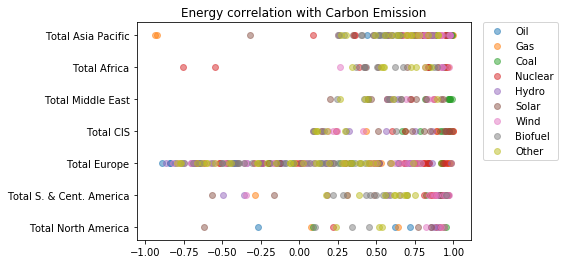

In [29]:
x = np.arange(-1.00,1.10,0.25)
b=a.drop('Countries',axis=1)
for i in range(0,len(b.columns)):
    plt.scatter(b.iloc[:,i],b.index, alpha=0.5)
    plt.legend(energy,bbox_to_anchor=(1.02,1.025), loc="upper left")
    plt.title('Energy correlation with Carbon Emission')

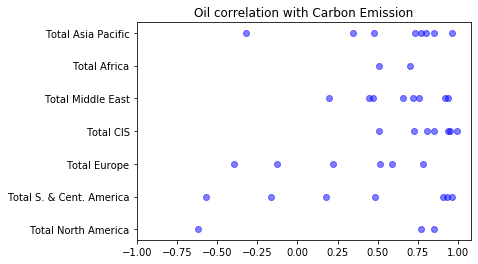

In [30]:
plt.scatter(b[energy[0]],b.index, alpha=0.5, c=dicts[energy[0]])
plt.title(f'{energy[0]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

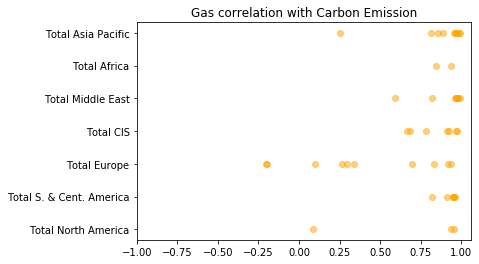

In [31]:
plt.scatter(a[energy[1]],a.index, alpha=0.5, c=dicts[energy[1]])
plt.title(f'{energy[1]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

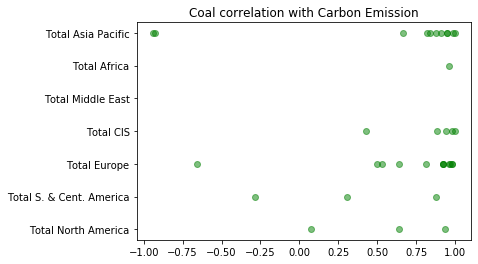

In [32]:
plt.scatter(b[energy[2]],b.index, alpha=0.5, c=dicts[energy[2]])
plt.title(f'{energy[2]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

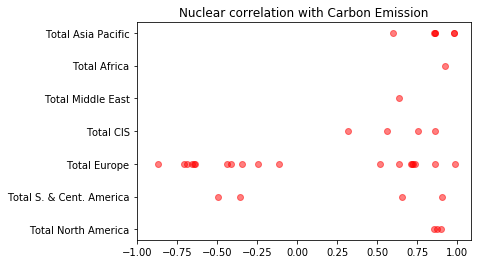

In [33]:
plt.scatter(b[energy[3]],b.index, alpha=0.5, c=dicts[energy[3]])
plt.title(f'{energy[3]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

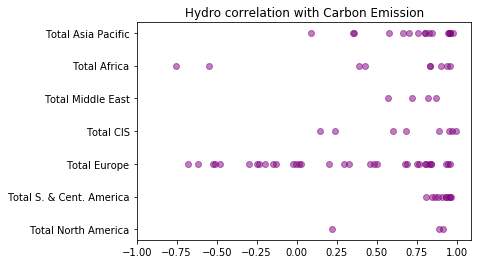

In [34]:
plt.scatter(b[energy[4]],b.index, alpha=0.5, c=dicts[energy[4]])
plt.title(f'{energy[4]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

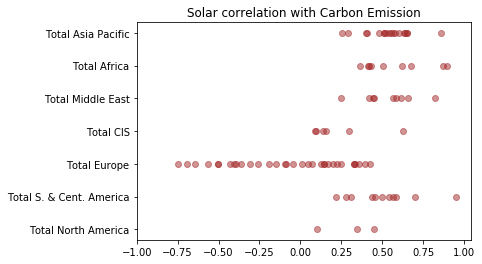

In [35]:
plt.scatter(b[energy[5]],b.index, alpha=0.5, c=dicts[energy[5]])
plt.title(f'{energy[5]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

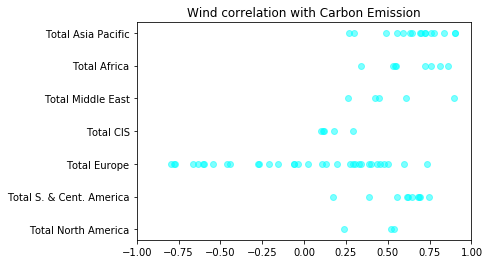

In [36]:
plt.scatter(b[energy[6]],b.index, alpha=0.5, c=dicts[energy[6]])
plt.title(f'{energy[6]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

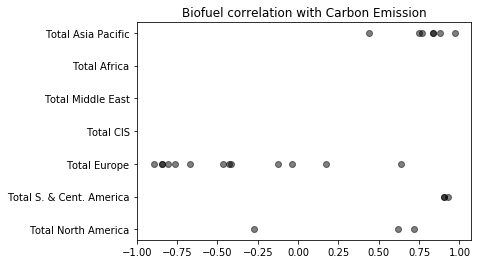

In [37]:
plt.scatter(b[energy[7]],b.index, alpha=0.5, c=dicts[energy[7]])
plt.title(f'{energy[7]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

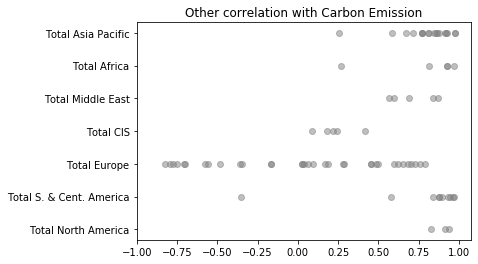

In [38]:
plt.scatter(b[energy[8]],b.index, alpha=0.5, c=dicts[energy[8]])
plt.title(f'{energy[8]} correlation with Carbon Emission')
plt.xticks(x)
plt.show()

### 7. Correlation graphs for each region using heatmap

In [39]:
Total_Countries_Corr.rename(columns={'Carbon':'Countries'},inplace=True)

North_America_Corr=Total_Countries_Corr.loc[Regions[0]]
Cent_America_Corr=Total_Countries_Corr.loc[Regions[1]]
Europe_Corr=Total_Countries_Corr.loc[Regions[2]]
CIS_Corr=Total_Countries_Corr.loc[Regions[3]]
Middle_East_Corr=Total_Countries_Corr.loc[Regions[4]]
Africa_Corr=Total_Countries_Corr.loc[Regions[5]]
Asia_Pacific_Corr=Total_Countries_Corr.loc[Regions[6]]

Countries_Region_Corr = [North_America_Corr,Cent_America_Corr,Europe_Corr,CIS_Corr,Middle_East_Corr,Africa_Corr,Asia_Pacific_Corr]

#Create an excel with the information
with ExcelWriter('Countries_Corr.xlsx', mode='w') as writer:
    for i in range(0,len(Regions)):
        c=Countries_Region_Corr[i]
        c.set_index('Countries',inplace=True)
        c=c.astype(float).round(3)
        c.to_excel(writer, '%s' % Regions[i])

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Canada,0.621898,0.076312,0.937727,0.912657,0.854412,0.852756,0.916753,0.448614,0.519656
Mexico,0.718058,0.93808,0.953441,0.886887,0.899477,0.769522,0.937109,0.343604,0.538245
US,-0.271448,0.640129,0.0882985,0.220581,0.874649,-0.621165,0.824446,0.103877,0.237046


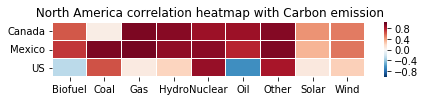

In [41]:
display(North_America_Corr)
corrmap=North_America_Corr
corrmap=corrmap.fillna(0)
corrmap.sort_values('Countries', inplace=True)

f, ax = plt.subplots(figsize=(7,1)) 
sns.heatmap(corrmap, cmap ="RdBu_r", linewidths = 0.1, vmin=-1, vmax=1)
plt.yticks(rotation=0, fontsize="10", va="center")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('{} correlation heatmap with Carbon emission'.format(Regions[0][5:]))
ax.set_ylabel('') 
plt.show()

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Argentina,0.90509,NaN,0.819794,0.847522,0.653756,0.484824,0.964978,0.455181,0.695389
Brazil,0.904448,-0.28791,0.964477,0.958136,0.906172,0.959684,0.892131,0.281267,0.555754
Chile,NaN,NaN,NaN,0.862276,NaN,NaN,0.933781,0.497418,0.617941
Colombia,0.930984,0.878972,0.955054,0.933445,NaN,0.909593,0.943652,0.217833,0.688929
Ecuador,NaN,NaN,NaN,0.930257,NaN,0.932775,0.840025,0.563371,0.647455
Peru,NaN,NaN,0.947995,0.910884,NaN,0.176041,0.874643,0.698791,0.680897
Trinidad & Tobago,NaN,NaN,0.94809,NaN,NaN,-0.566122,-0.349618,0.950864,NaN
Venezuela,NaN,0.306778,0.90966,0.961592,NaN,-0.166928,NaN,0.435175,0.174111
Central America,NaN,NaN,NaN,0.953475,-0.358012,NaN,0.970296,0.544277,0.748092


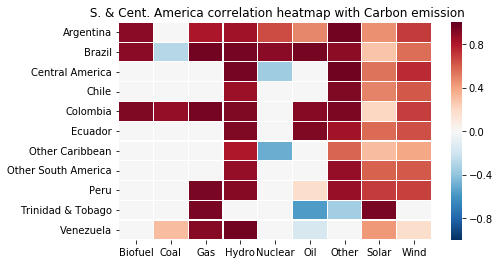

In [42]:
display(Cent_America_Corr)
corrmap=Cent_America_Corr.fillna(0)
corrmap.sort_values('Countries', inplace=True)

f, ax = plt.subplots(figsize=(7,4)) 
sns.heatmap(corrmap, ax = ax, cmap ="RdBu_r", linewidths = 0.1, vmin=-1, vmax=1)
plt.yticks(rotation=0, fontsize="10", va="center")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('{} correlation heatmap with Carbon emission'.format(Regions[1][5:]))
ax.set_ylabel('') 
plt.show()

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Austria,-0.0390593,NaN,NaN,0.680002,NaN,NaN,0.595616,0.141636,0.338333
Belgium,-0.76252,NaN,NaN,-0.238351,-0.109683,NaN,-0.167785,-0.309108,-0.269942
Bulgaria,NaN,0.500758,NaN,-0.151044,-0.244703,NaN,-0.359875,-0.395191,-0.445186
Croatia,NaN,NaN,NaN,0.934778,NaN,NaN,0.280227,0.24808,0.303505
Cyprus,NaN,NaN,NaN,NaN,NaN,NaN,0.484503,0.33347,0.387769
Czech Republic,NaN,0.982032,NaN,-0.246132,-0.864975,NaN,-0.699179,-0.565069,-0.632544
Denmark,NaN,NaN,-0.201518,0.484906,NaN,-0.128831,-0.750975,-0.746799,-0.792915
Estonia,NaN,NaN,NaN,0.328854,NaN,NaN,0.287278,0.199223,0.291941
Finland,-0.667699,NaN,NaN,0.201591,0.637708,NaN,0.496777,-0.0947765,-0.153968


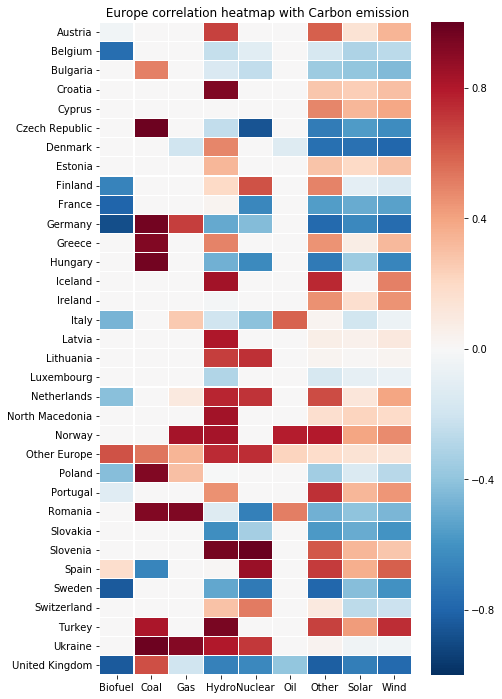

In [43]:
display(Europe_Corr)
corrmap=Europe_Corr.fillna(0)
corrmap.sort_values('Countries', inplace=True)

f, ax = plt.subplots(figsize=(7,12)) 
sns.heatmap(corrmap, ax = ax, cmap ="RdBu_r", linewidths = 0.1, vmin=-1, vmax=1)
plt.yticks(rotation=0, fontsize="10", va="center")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('{} correlation heatmap with Carbon emission'.format(Regions[2][5:]))
ax.set_ylabel('') 
plt.show()

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Azerbaijan,NaN,NaN,0.686373,0.682382,NaN,0.510038,0.183724,0.13945,0.111736
Belarus,NaN,NaN,NaN,0.239787,NaN,NaN,0.218831,0.0899174,0.116235
Kazakhstan,NaN,0.981534,0.666,0.891269,0.321053,0.72903,0.244213,0.299671,0.293754
Russian Federation,NaN,0.885015,0.924012,0.949722,0.858434,0.939061,0.414211,0.158318,0.179071
Turkmenistan,NaN,NaN,0.782997,0.146264,NaN,0.949104,NaN,0.629684,NaN
USSR,NaN,0.999772,0.968233,0.995154,0.752735,0.993215,NaN,NaN,NaN
Uzbekistan,NaN,0.430912,0.971524,0.969875,NaN,0.848521,NaN,NaN,NaN
Other CIS,NaN,0.944825,0.909549,0.599885,0.562469,0.809929,0.089271,0.0935364,0.0984759


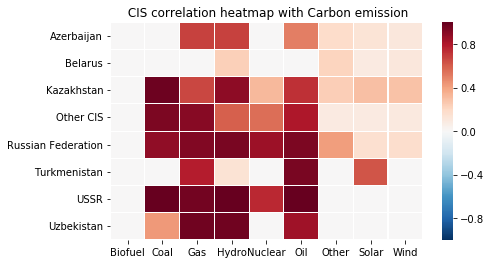

In [44]:
display(CIS_Corr)
corrmap=CIS_Corr.fillna(0)
corrmap.sort_values('Countries', inplace=True)

f, ax = plt.subplots(figsize=(7,4)) 
sns.heatmap(corrmap, ax = ax, cmap ="RdBu_r", linewidths = 0.1, vmin=-1, vmax=1)
plt.yticks(rotation=0, fontsize="10", va="center")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('{} correlation heatmap with Carbon emission'.format(Regions[3][5:]))
ax.set_ylabel('') 
plt.show()

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Iran,NaN,NaN,0.964121,0.822598,0.639247,0.198103,0.689573,0.417336,0.895829
Iraq,NaN,NaN,0.818325,0.721867,NaN,0.467946,NaN,0.612635,NaN
Israel,NaN,NaN,NaN,0.871836,NaN,NaN,0.568619,0.442368,0.424795
Kuwait,NaN,NaN,0.968774,NaN,NaN,0.444562,NaN,0.447138,0.445944
Oman,NaN,NaN,0.975828,NaN,NaN,0.756012,NaN,0.584319,NaN
Qatar,NaN,NaN,0.972784,NaN,NaN,0.934796,0.869839,0.823719,NaN
Saudi Arabia,NaN,NaN,0.993751,NaN,NaN,0.717576,NaN,0.657598,NaN
United Arab Emirates,NaN,NaN,0.980565,NaN,NaN,0.919027,0.596107,0.566095,0.608444
Other Middle East,NaN,NaN,0.588986,0.571463,NaN,0.659184,0.83719,0.245682,0.2647


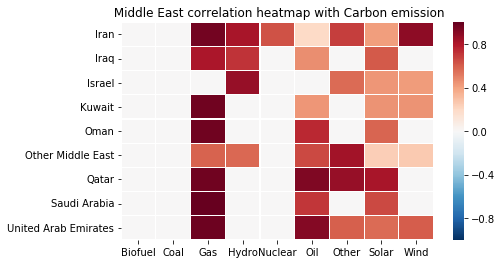

In [45]:
display(Middle_East_Corr)
corrmap=Middle_East_Corr.fillna(0)
corrmap.sort_values('Countries', inplace=True)

f, ax = plt.subplots(figsize=(7,4)) 
sns.heatmap(corrmap, ax = ax, cmap ="RdBu_r", linewidths = 0.1, vmin=-1, vmax=1)
plt.yticks(rotation=0, fontsize="10", va="center")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('{} correlation heatmap with Carbon emission'.format(Regions[4][5:]))
ax.set_ylabel('') 
plt.show()

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Algeria,NaN,NaN,0.84299,-0.549425,NaN,0.699166,NaN,0.50525,0.53159
Egypt,NaN,NaN,0.935442,0.834063,NaN,0.508607,NaN,0.421235,0.856804
Morocco,NaN,NaN,NaN,0.387797,NaN,NaN,NaN,0.433652,0.722817
South Africa,NaN,0.963333,NaN,0.425415,0.924767,NaN,0.816975,0.364182,0.341724
Eastern Africa,NaN,NaN,NaN,0.956657,NaN,NaN,0.972048,0.873616,0.812092
Middle Africa,NaN,NaN,NaN,0.942219,NaN,NaN,0.265445,0.895142,0.542203
Western Africa,NaN,NaN,NaN,0.899876,NaN,NaN,0.923114,0.675376,0.759627
Other Northern Africa,NaN,NaN,NaN,-0.754721,NaN,NaN,NaN,0.41612,0.549156
Other Southern Africa,NaN,NaN,NaN,0.835489,NaN,NaN,0.925182,0.621844,NaN


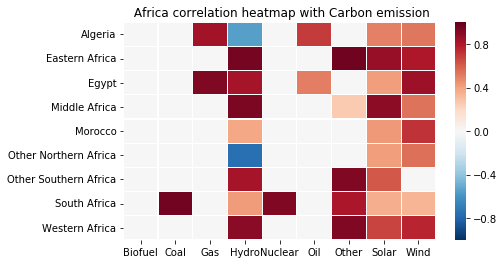

In [46]:
display(Africa_Corr)
corrmap=Africa_Corr.fillna(0)
corrmap.sort_values('Countries', inplace=True)

f, ax = plt.subplots(figsize=(7,4)) 
sns.heatmap(corrmap, ax = ax, cmap ="RdBu_r", linewidths = 0.1, vmin=-1, vmax=1)
plt.yticks(rotation=0, fontsize="10", va="center")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('{} correlation heatmap with Carbon emission'.format(Regions[5][5:]))
ax.set_ylabel('') 
plt.show()

,Biofuel,Coal,Gas,Hydro,Nuclear,Oil,Other,Solar,Wind
Countries,,,,,,,,,
Australia,0.749,0.949,0.815,0.700,NaN,0.477,0.848,0.482,0.630
Bangladesh,NaN,NaN,0.992,0.575,NaN,NaN,0.874,0.861,0.900
China,0.971,0.998,0.962,0.959,0.855,0.852,0.815,0.514,0.723
China Hong Kong SAR,NaN,NaN,NaN,NaN,NaN,NaN,0.673,0.654,0.775
India,0.882,0.988,0.858,0.959,0.978,0.802,0.927,0.640,0.902
Indonesia,0.769,0.949,0.887,0.945,NaN,-0.318,0.974,0.555,0.301
Japan,NaN,-0.939,NaN,0.354,0.600,NaN,0.772,0.256,0.491
Malaysia,NaN,NaN,0.986,0.827,NaN,0.767,0.716,0.600,NaN
New Zealand,NaN,0.819,NaN,0.799,NaN,NaN,0.807,0.401,0.692


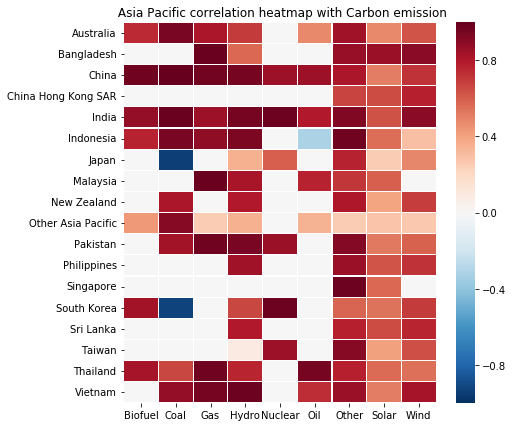

In [63]:
Asia_Pacific_Corr=Asia_Pacific_Corr.astype(float).round(3)
display(Asia_Pacific_Corr)
corrmap=Asia_Pacific_Corr.fillna(0)
corrmap.sort_values('Countries', inplace=True)

f, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(corrmap, ax = ax, cmap ="RdBu_r", linewidths = 0.1, vmin=-1, vmax=1)
plt.yticks(rotation=0, fontsize="10", va="center")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.title('{} correlation heatmap with Carbon emission'.format(Regions[6][5:]))
ax.set_ylabel('') 
plt.show()